In [2]:
from Gemini.GeminiPredict import GeminiPredict
from Generation.Equation_BaseDataset import Equation, BaseDataset
from Postprocessing.SOE_EquationGraph import SystemOfEquations, EquationGraph
from Scraping.Scraper import Scraper

import os
import google.generativeai as genai
from sympy import *

# Main

In [ ]:
def main():
    doi = "10.1016/j.jmatprotec.2017.04.005"
    api_key = os.getenv("ELSEVIER_API_KEY")
    scraper = Scraper(doi, api_key)

### Gemini

In [2]:
api_key = os.getenv("GEMINI_API_KEY")
gp = GeminiPredict(api_key, "Data/HTC_equations.txt", "tunedModels/mmltopython4-f3fuppiemnq9")
gp.predict_from_txt()
gp.save_predictions("Data/HTC_gemini_predictions.txt")

API key loaded successfully!


Generating Predictions: 100%|██████████| 13/13 [00:19<00:00,  1.46s/row]


In [3]:
gp.save_predictions()
# for model in genai.list_tuned_models():
#     print(model.name)

### Generation

In [4]:
eq = Equation()
py, mml = eq.generate()
print(repr(py))


"I = Symbol('I')\nx = Symbol('x')\ny_τ = Symbol('y_τ')\nΣ = Symbol('Σ')\nB = Symbol('B')\ne = Eq(I, -exp(Σ/4)**(sqrt(y_τ**x)) + tan(B))"


In [3]:
import csv
class GeminiDataset(BaseDataset):
    def __init__(self, num, filepath):
        super().__init__(num, filepath)

    def get_columns(self):
        return ["text_input", "output"]
    
gd = GeminiDataset(5, "Data/gemini_test_6.csv")
gd.create()


Generating dataset: 100%|██████████| 5/5 [00:00<00:00, 84.53it/s]

Τ = Symbol('Τ')
ζ = Symbol('ζ')
l_Π = Symbol('l_Π')
δ_a = Symbol('δ_a')
e = Eq(Τ, sqrt(ζ) + cos(l_Π - δ_a))
Ψ = Symbol('Ψ')
α = Symbol('α')
Ψ_xqχ = Symbol('Ψ_xqχ')
e = Eq(Ψ, sqrt(α) - cos(Ψ_xqχ) + 7)
Μ = Symbol('Μ')
H = Symbol('H')
m_Ψ = Symbol('m_Ψ')
Z = Symbol('Z')
b = Symbol('b')
e = Eq(Μ, sqrt(-H + m_Ψ)*exp(b)**Z)
Ξ_c = Symbol('Ξ_c')
Υ = Symbol('Υ')
Σ_ο = Symbol('Σ_ο')
e = Eq(Ξ_c, -exp(Υ) + cos(Σ_ο))
A_σm = Symbol('A_σm')
Θ = Symbol('Θ')
χ_Χμ = Symbol('χ_Χμ')
G_μ = Symbol('G_μ')
φ = Symbol('φ')
e = Eq(A_σm, G_μ**(sin(Θ + χ_Χμ)/2)/log(φ))


### Postprocessing

In [2]:
soe = SystemOfEquations("Data/HTC_gemini5_predictions.txt")
for eq in soe.str_equations:
    soe.parse_equation(eq)
print(soe.eq)
equations = soe.reduce_system(1)
print(equations)

[Eq(h, h_c + h_g), Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ), Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86), Eq(h, A*(1 - exp(-B*P))), Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w))), Eq(h, h_a + h_c + h_l), Eq(h_c, K_st*N_P*α/R), Eq(K_st, 2/(1/k_t + 1/k_s)), Eq(R, sqrt(Rs**2 + Rt**2)), Eq(N_P, 1 - exp(-P*λ/σ_U)), Eq(h_l, K_stl*N_L*β/R), Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), Eq(N_L, 1 - exp(-γ*δ))]


KeyError: P

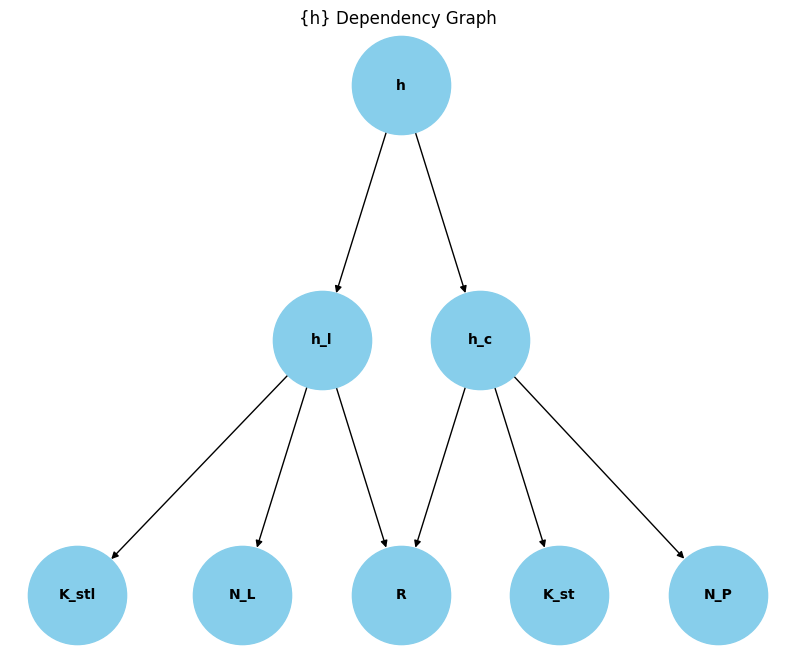

In [5]:
# Constants
k_s = 0.14
k_t = 0.0315
k_l = 0.024
Rs = 3.4e-07
Rt = 9.6e-07
h_a = 0.8
σ_U = 21.0
α = 0.000201
λ = 6.05
β = 0.00011
γ = 200000.0
δ = 1.5e-5
P = 10

k = 1
p = 1
H = 1
θ = 1
σ = 1
K = 1
C = 1
A = 1
B = 1
k_f = 1
k_w = 1
h_f = 1
h_g = 1

# Variables
h = Symbol("h")
h_c = Symbol("h_c")
K_st = Symbol("K_st")
R = Symbol("R")
N_P = Symbol("N_P")
h_l = Symbol("h_l")
K_stl = Symbol("K_stl")
N_L = Symbol("N_L")
a = Symbol("a")
b = Symbol("b")

exprs = [Eq(h, h_c + h_g), 
            Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ), 
            Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86), 
            Eq(h, A*(1 - exp(-B*P))), 
            Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w))), 
            Eq(h, h_a + h_c + h_l), 
            Eq(h_c, K_st*N_P*α/R), 
            Eq(K_st, 2/(1/k_t + 1/k_s)), 
            Eq(R, sqrt(Rs**2 + Rt**2)), 
            Eq(N_P, 1 - exp(-P*λ/σ_U)), 
            Eq(h_l, K_stl*N_L*β/R), 
            Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), 
            Eq(N_L, 1 - exp(-γ*δ))]


eg = EquationGraph(exprs, 6)
eg.plot_graph()

### Scraping

In [ ]:
sc = Scraper()